El EDA, debería incluir gráficas interesantes para extraer datos, como por ejemplo:
- una nube de palabras con las palabras más frecuentes en los títulos de las películas.

In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [209]:
dfEDA = pd.read_csv('./datasets/merged_movies_credits_2.csv')

In [163]:
#df_raw = pd.read_csv('merged_movies_credits.csv')

In [183]:
#dfEDA.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [208]:
dfEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45448 entries, 0 to 45447
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45448 non-null  float64
 1   genres                45448 non-null  object 
 2   id                    45448 non-null  int64  
 3   original_language     45448 non-null  object 
 4   popularity            45448 non-null  float64
 5   production_companies  45448 non-null  object 
 6   production_countries  45448 non-null  object 
 7   release_date          45448 non-null  object 
 8   revenue               45448 non-null  float64
 9   runtime               45448 non-null  float64
 10  spoken_languages      45448 non-null  object 
 11  title                 45448 non-null  object 
 12  vote_average          45448 non-null  float64
 13  vote_count            45448 non-null  int64  
 14  return                45448 non-null  float64
 15  release_year       

In [165]:
# En este código, pd.to_numeric() se utiliza para convertir los valores en la columna 'id' a numéricos, y el 
# parámetro errors='coerce' garantiza que los valores no válidos se conviertan en NaN. Luego, dropna() se usa para 
# eliminar las filas que contienen NaN en la columna 'id'. Por último, astype(int) se utiliza para convertir la 
#columna 'id' al tipo de datos entero.

#df_raw['id'] = pd.to_numeric(df_raw['id'], errors='coerce')
#df_raw = df_raw.dropna(subset=['id'])
#df_raw['id'] = df_raw['id'].astype(int)

In [ ]:
#dfEDA = pd.merge(dfEDA, df_raw[['id', 'tagline']], on='id', how='left')

In [206]:
dfEDA.to_csv('merged_movies_credits_2.csv',index=False)

In [204]:
#dfEDA['genres'].astype(str)
#dfEDA['tagline']=dfEDA['tagline'].astype(str)
#dfEDA['tagline']=dfEDA['tagline'].replace('nan','')
dfEDA['tagline']=dfEDA['tagline'].fillna('')

In [ ]:
#dfEDA['genres'] = dfEDA['genres'].str.replace('[', '').str.replace(']', '')
#dfEDA['genres'] = dfEDA['genres'].str.replace("'", "").str.replace("'", "")
dfEDA['genres']=dfEDA['genres'].fillna('ND')

In [ ]:
title_sopa = ' '.join(dfEDA['title'])
tagline_sopa = ' '.join(dfEDA['tagline'])
cast_sopa = ' '.join(dfEDA['cast'])

## *** WordCloud con los titulos de los films ***

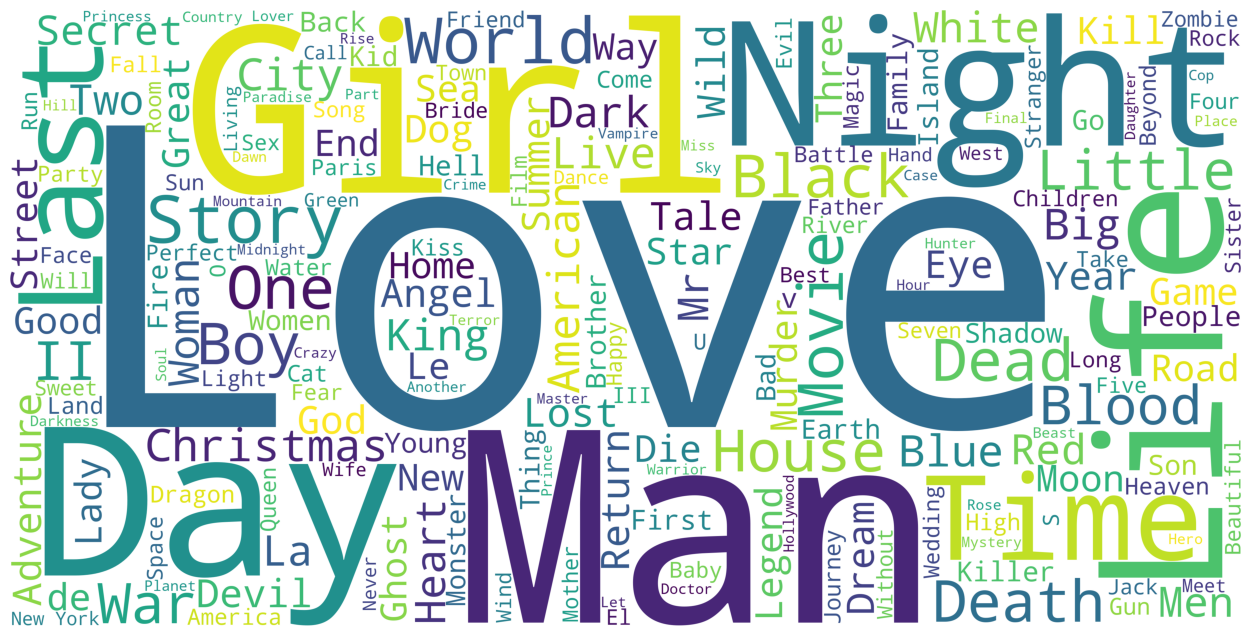

In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_sopa)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### *** WordCloud con la columna 'tagline' ***

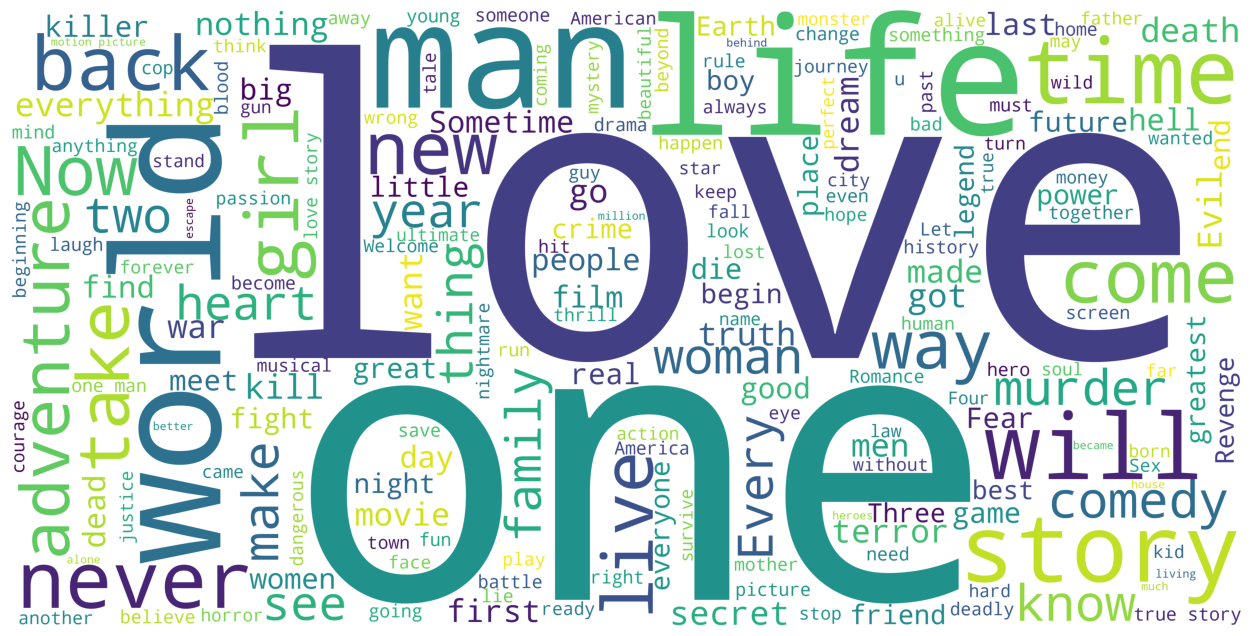

In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(tagline_sopa)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

###  *** Top 7 Cantidad de films por idioma ***

In [ ]:
idioma_df = pd.DataFrame(dfEDA['original_language'].value_counts())
idioma_df['Idioma'] = idioma_df.index
idioma_df.columns = ['cantidad', 'Idioma']
idioma_df.head(7)

,cantidad,Idioma
original_language,,
EN,32246,EN
FR,2442,FR
IT,1528,IT
JA,1355,JA
DE,1081,DE
ES,991,ES
RU,822,RU


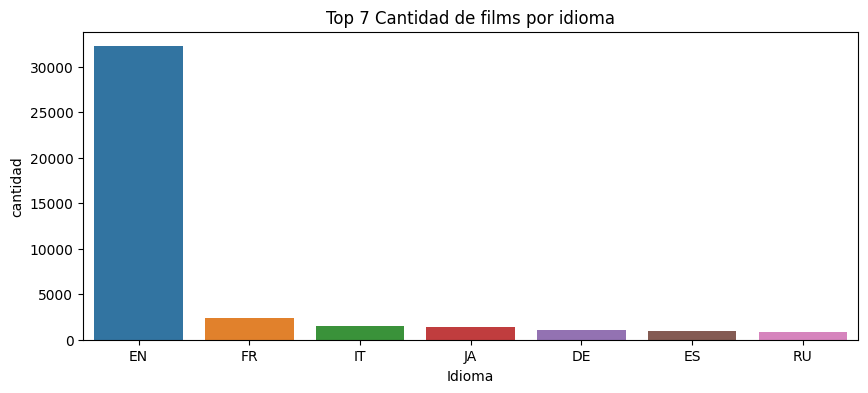

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='Idioma', y='cantidad', data=idioma_df.iloc[0:7])
plt.title('Top 7 Cantidad de films por idioma')
plt.show()

### *** Cantidad de peliculas por anio por periodo (2007 - 2018) ***

In [ ]:
dfEDA.release_year.max()

2020

In [ ]:
# Filtrar los datos por año
filtro_anio = (dfEDA['release_year'] <= 2018) & (dfEDA['release_year'] >= 2007)
anio_df = pd.DataFrame(dfEDA[filtro_anio]['release_year'].value_counts())
anio_df['anio'] = anio_df.index
anio_df.columns = ['cantidad','anio']
anio_df.head(10)

,cantidad,anio
release_year,,
2014,1976,2014
2015,1906,2015
2013,1895,2013
2012,1727,2012
2011,1669,2011
2016,1604,2016
2009,1591,2009
2010,1501,2010
2008,1482,2008


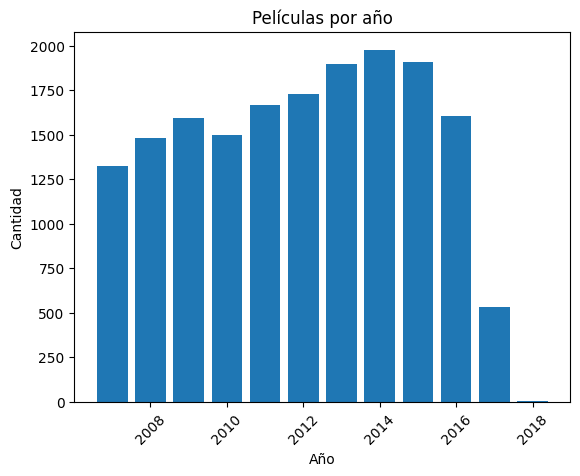

In [ ]:
# Filtrar los datos desde el último año hasta 2007
filtro_anio = (anio_df['anio'] <= 2018) & (anio_df['anio'] >= 2007)
anio_df_filtrado = anio_df[filtro_anio]
# Crear figura y ejes
fig, ax = plt.subplots()
# Graficar el barplot
ax.bar(anio_df_filtrado['anio'], anio_df_filtrado['cantidad'])
# Configurar etiquetas y título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title('Películas por año')
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
plt.show()

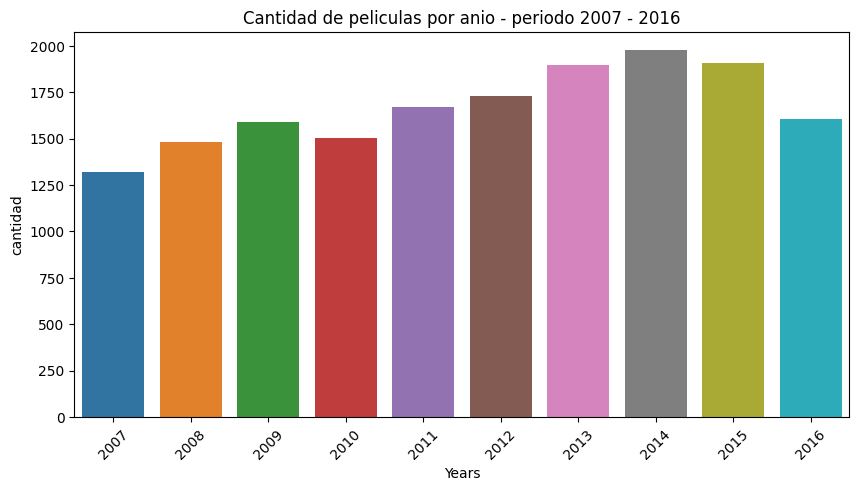

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='anio', y='cantidad', data=anio_df.iloc[0:10])
plt.title('Cantidad de peliculas por anio - periodo 2007 - 2016')
plt.xlabel('Years')
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)
plt.show()

### *** Top 10 Peliculas mas populares ***

In [ ]:
dfEDA[['title', 'popularity', 'release_year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,release_year
30745,Minions,547.488298,2015
33399,Wonder Woman,294.337037,2017
42227,Beauty and the Beast,287.253654,2017
43642,Baby Driver,228.032744,2017
24498,Big Hero 6,213.849907,2014
26619,Deadpool,187.860492,2016
26621,Guardians of the Galaxy Vol. 2,185.330992,2017
14611,Avatar,185.070892,2009
24394,John Wick,183.870374,2014
23717,Gone Girl,154.801009,2014


### *** Top 10 por votacion ***

In [ ]:
dfEDA[['title', 'vote_count', 'release_year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,release_year
15538,Inception,14075,2010
12520,The Dark Knight,12269,2008
14611,Avatar,12114,2009
17879,The Avengers,12000,2012
26619,Deadpool,11444,2016
22923,Interstellar,11187,2014
20110,Django Unchained,10297,2012
23795,Guardians of the Galaxy,10014,2014
2852,Fight Club,9678,1999
18304,The Hunger Games,9634,2012


### *** Cantidad de peliculas a traves de los anios ***

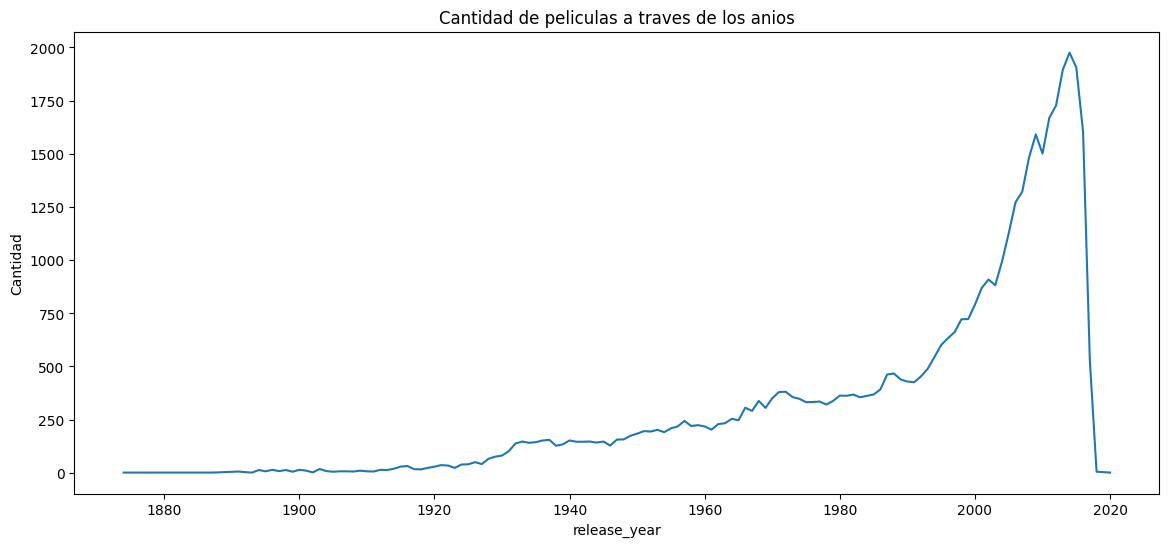

In [ ]:
count_anio = dfEDA.groupby('release_year')['title'].count()
plt.figure(figsize=(14,6))
plt.title('Cantidad de peliculas a traves de los anios')
plt.xlabel('Anios')
plt.ylabel('Cantidad')
#plt.xticks(rotation=45)
count_anio.plot()
plt.show()

### *** Top 10 Generos de peliculas ***

In [170]:
generos = pd.DataFrame(dfEDA['genres'].value_counts()).reset_index()
generos.columns = ['genres', 'movies']
generos.head(10)

,genres,movies
0,Drama,5006
1,Comedy,3623
2,Documentary,2718
3,ND,2384
4,"Drama, Romance",1303
5,"Comedy, Drama",1140
6,Horror,974
7,"Comedy, Romance",929
8,"Comedy, Drama, Romance",593
9,"Drama, Comedy",534


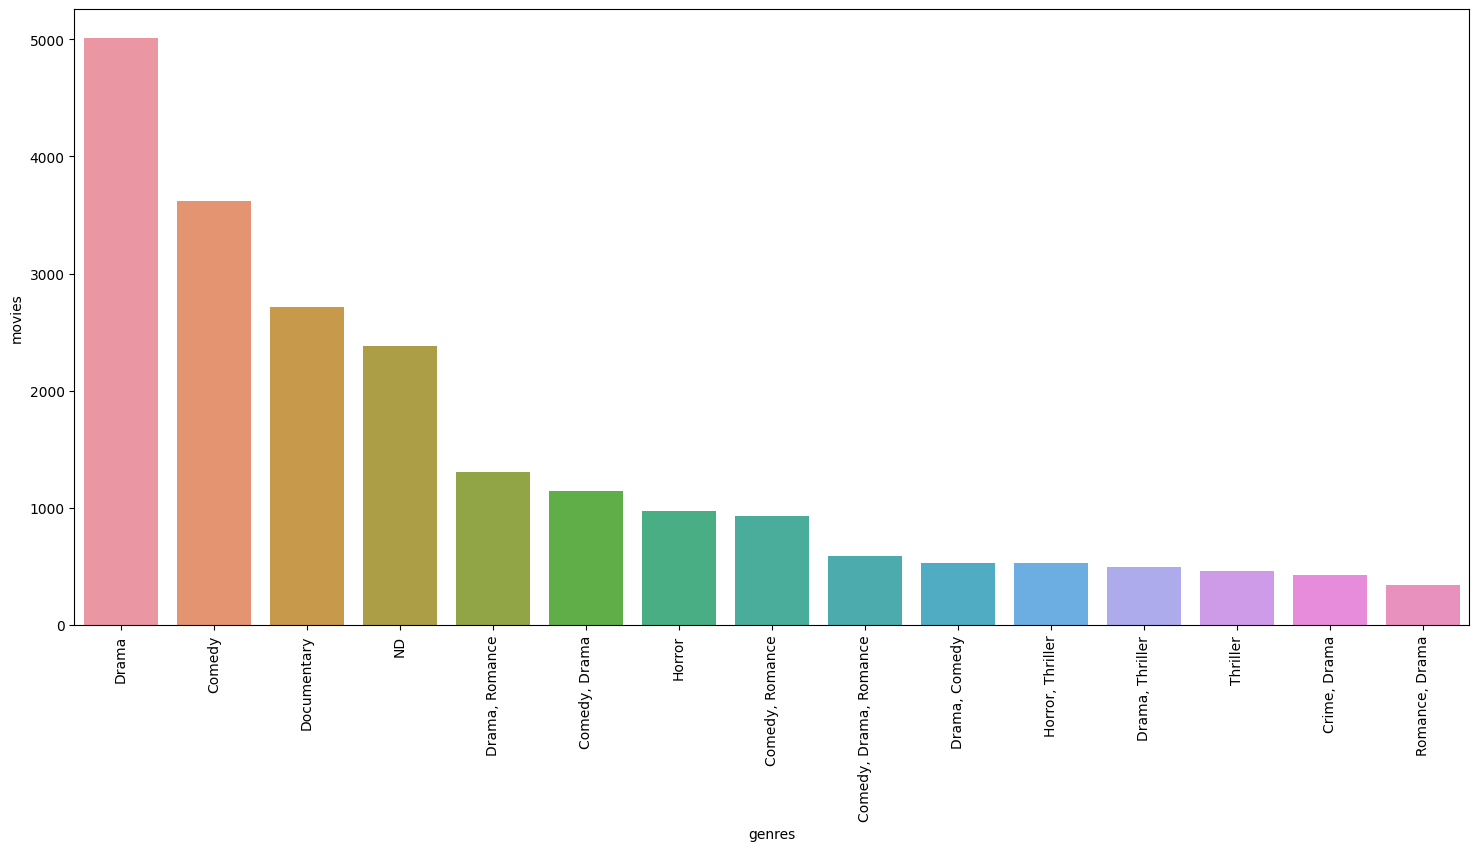

In [171]:
plt.figure(figsize=(18,8))
sns.barplot(x='genres', y='movies', data=generos.head(15))
plt.xticks(rotation=90)
plt.show()